# TMDB Box Office Prediction


## Dataset Description 
- In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

- Data Description id - Integer unique id of each movie

- belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.

- budget:Budget of a movie in dollars. 0 values mean unknown.

- genres : Contains all the Genres Name & TMDB Id in JSON Format

- homepage - Contains the official homepage URL of a movie.

- imdb_id - IMDB id of a movie (string).

- original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

- original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

- overview - Brief description of the movie.

- popularity - Popularity of the movie in float.

- poster_path - Poster path of a movie. You can see the full image.

- production_companies - All production company name and TMDB id in JSON format of a movie.

- production_countries - Two digit code and full name of the production company in JSON format.

- release_date - Release date of a movie in mm/dd/yy format.

- runtime - Total runtime of a movie in minutes (Integer).

- spoken_languages - Two digit code and full name of the spoken language.

- status - Is the movie released or rumored?

- tagline - Tagline of a movie

- title - English title of a movie

- Keywords - TMDB Id and name of all the keywords in JSON format.

- cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

- crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

- revenue - Total revenue earned by a movie in dollars.


In [160]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_palette(sns.color_palette("bright6"))
sns.set_style('darkgrid')

In [161]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [162]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [164]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [165]:
# concate the train and test dataset for EDA 
data = pd.concat([train_data,test_data],axis=0) # pandas concat function pd.concat([dataset1,dataset2,..],axis=0) (0/'index', 1/'columns')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spoken_la

In [167]:
data.isnull().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                  4398
dtype: int64

<Axes: >

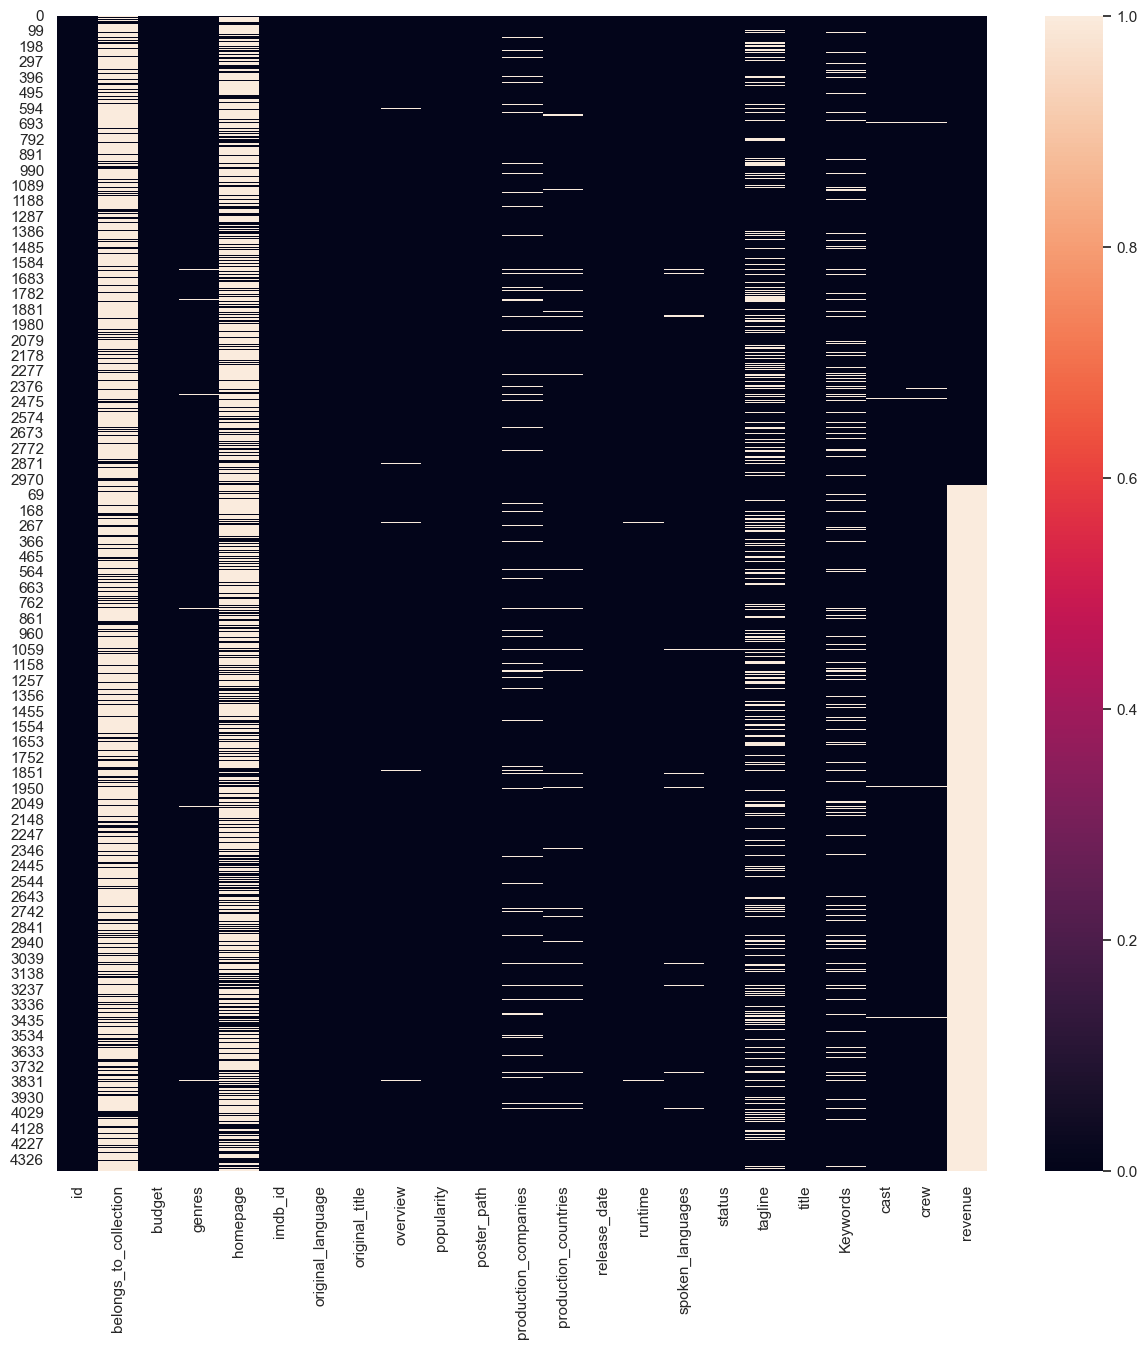

In [168]:
plt.figure(figsize=(15,15))
sns.heatmap(data.isnull(),cbar=True)

In [169]:
data.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [170]:
data.select_dtypes(include='object').describe()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,1481,7375,2366,7398,7398,7398,7376,7396,6984,7241,7397,7336,7396,5938,7395,6729,7372,7360
unique,750,1520,2331,7398,44,7265,7375,7396,5544,654,4703,761,3,5924,7239,6496,7339,7360
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.missionimpossible.com/,tt2637294,en,King Kong,No overview found.,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Anna Karenina,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
freq,26,614,4,1,6351,3,2,1,123,4339,10,4521,7385,3,3,56,34,1


## EDA on Train_data

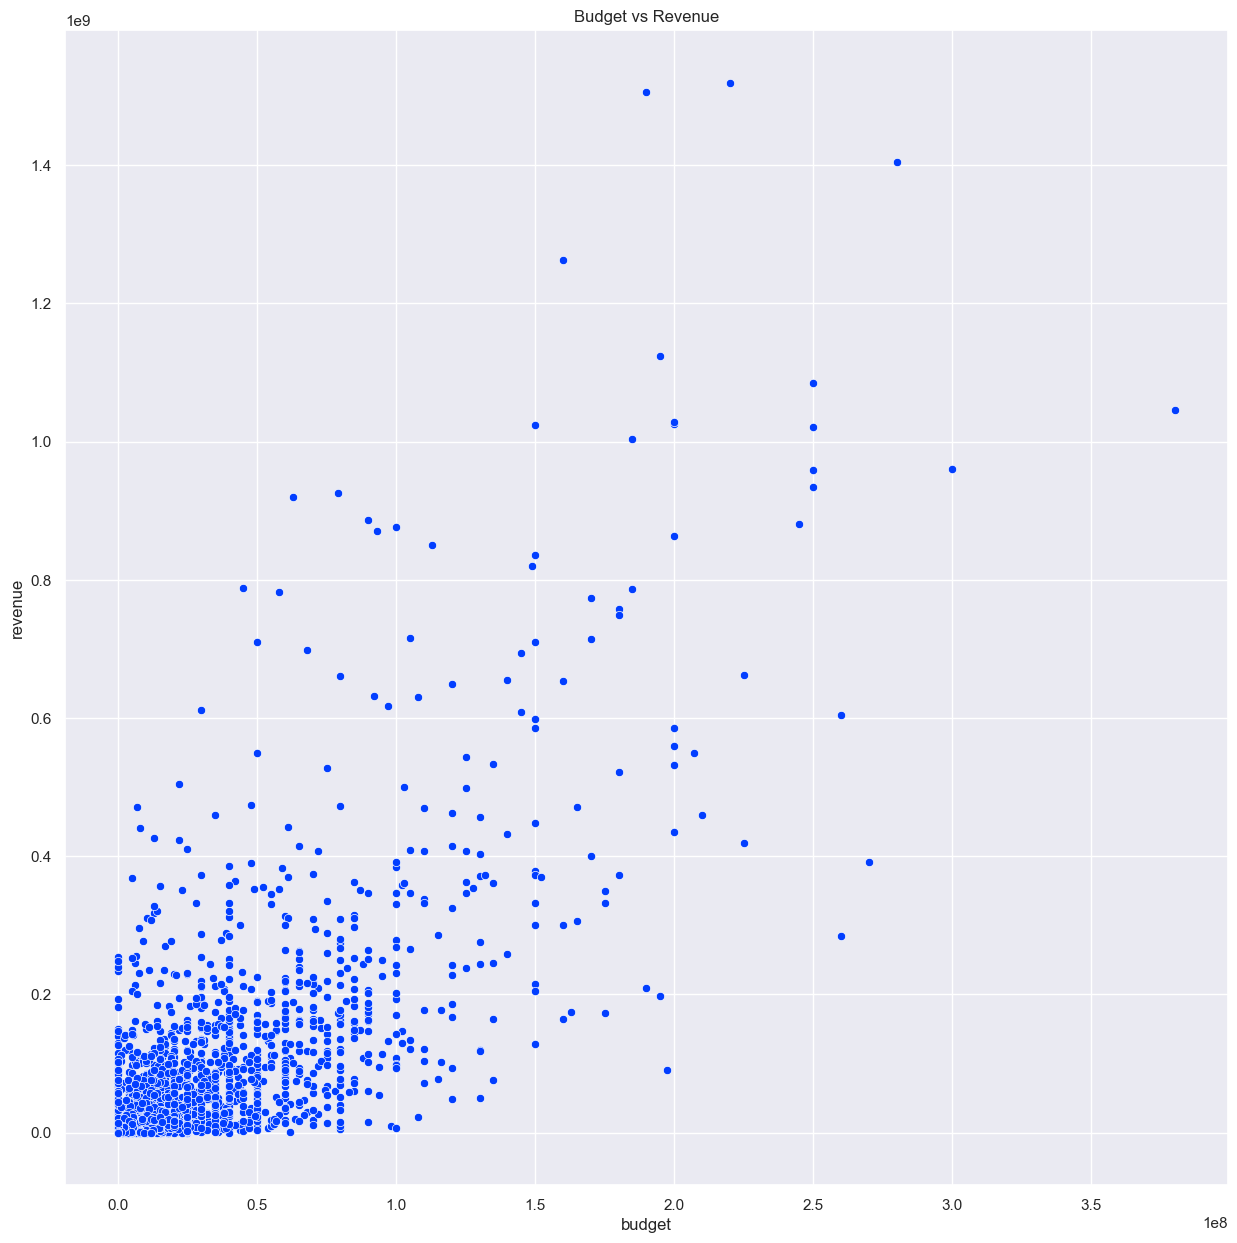

In [171]:
# budget vs revenue
plt.figure(figsize=(15,15))
sns.scatterplot(data=train_data,x='budget',y='revenue')
plt.title('Budget vs Revenue')
plt.show()

In [172]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [173]:
high_budget_movie = train_data[train_data['budget']>=10000000]
high_budget_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1423 non-null   int64  
 1   belongs_to_collection  354 non-null    object 
 2   budget                 1423 non-null   int64  
 3   genres                 1423 non-null   object 
 4   homepage               554 non-null    object 
 5   imdb_id                1423 non-null   object 
 6   original_language      1423 non-null   object 
 7   original_title         1423 non-null   object 
 8   overview               1422 non-null   object 
 9   popularity             1423 non-null   float64
 10  poster_path            1423 non-null   object 
 11  production_companies   1414 non-null   object 
 12  production_countries   1421 non-null   object 
 13  release_date           1423 non-null   object 
 14  runtime                1423 non-null   float64
 15  spoken_la

In [174]:
high_budget_movie.describe()

,id,budget,popularity,runtime,revenue
count,1423.000000,1.423000e+03,1423.000000,1423.000000,1.423000e+03
mean,1507.661982,4.550448e+07,11.475117,112.173577,1.227986e+08
std,877.062349,4.334539e+07,16.344451,21.755096,1.799734e+08
min,1.000000,1.000000e+07,0.377787,0.000000,1.200000e+01
25%,737.500000,1.700000e+07,6.726522,98.000000,2.024360e+07
50%,1511.000000,3.000000e+07,9.570657,108.000000,6.096585e+07
75%,2277.500000,6.000000e+07,12.853179,123.000000,1.491309e+08
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


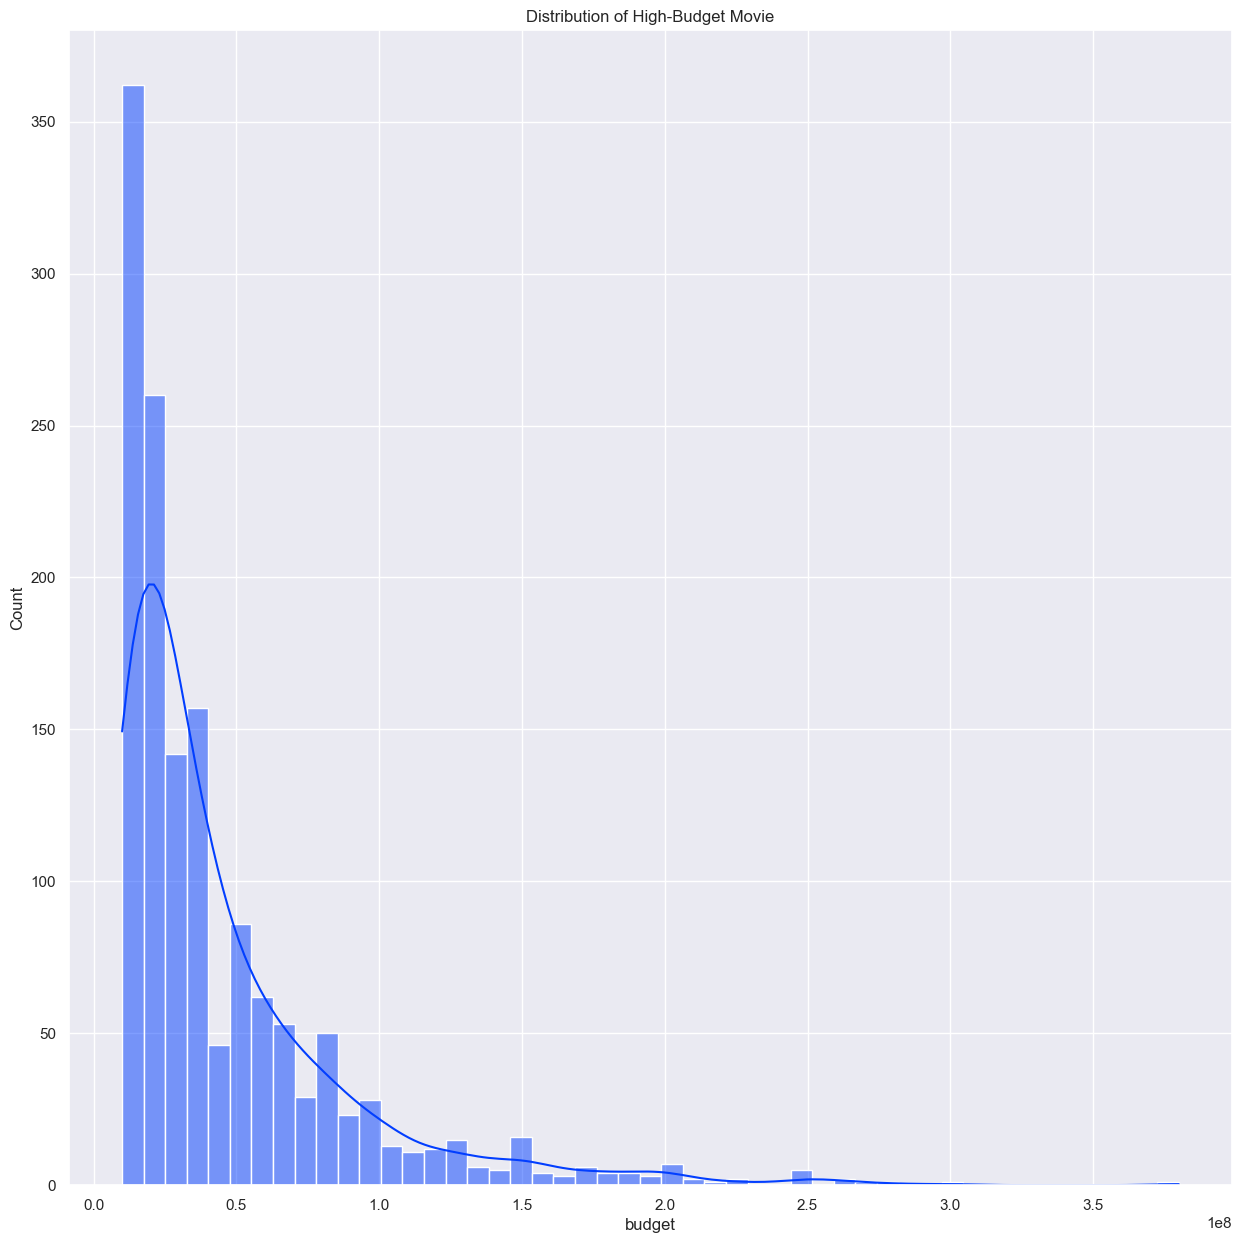

In [175]:
plt.figure(figsize=(15,15))
sns.histplot(data=high_budget_movie,x='budget',kde=True)
plt.title('Distribution of High-Budget Movie')
plt.show()

In [176]:
high_budget_movie[high_budget_movie['budget']>300000000]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,...,5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802


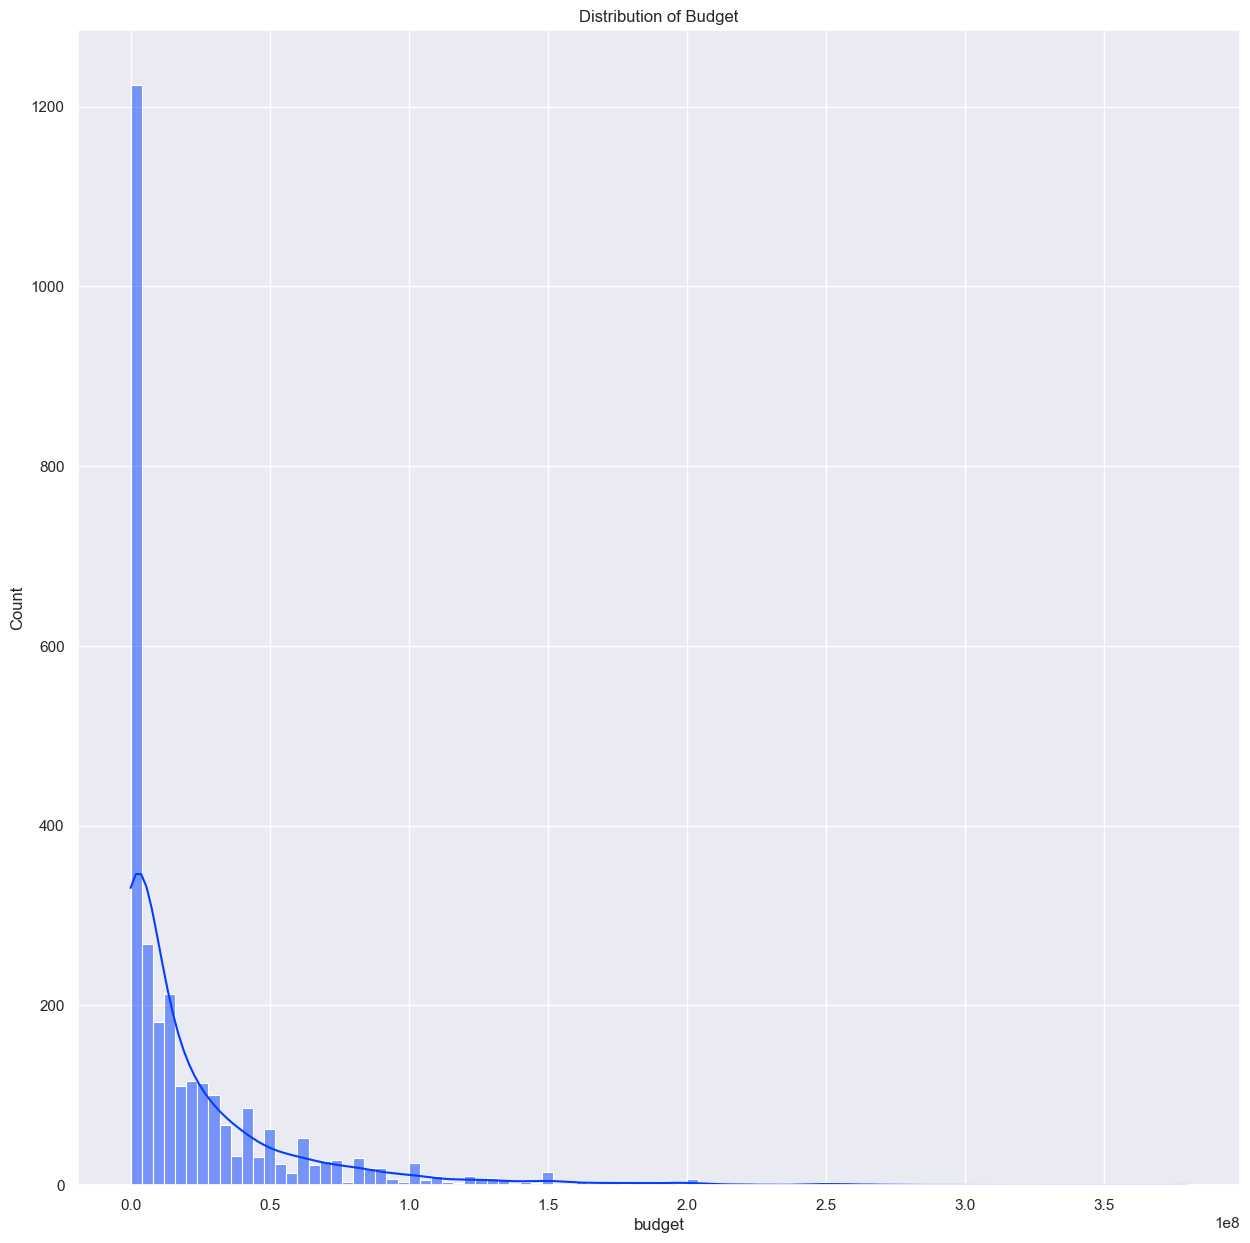

In [177]:
plt.figure(figsize=(15,15))
sns.histplot(data=train_data,x='budget',kde=True)
plt.title('Distribution of Budget')
plt.show()

*Revenue varibale is highly right-skewed with a lot of movies have budget of $0*

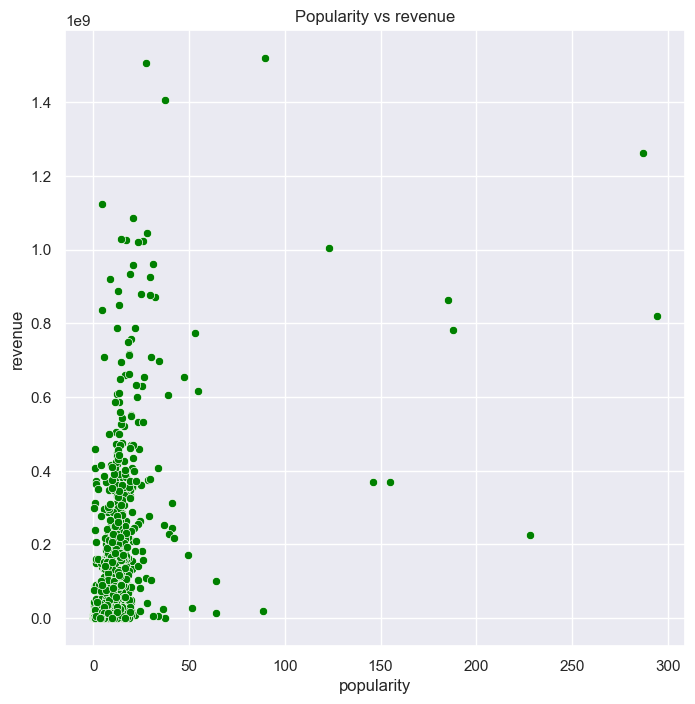

In [178]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_data,x='popularity',y='revenue',color='green')
plt.title('Popularity vs revenue')
plt.show()

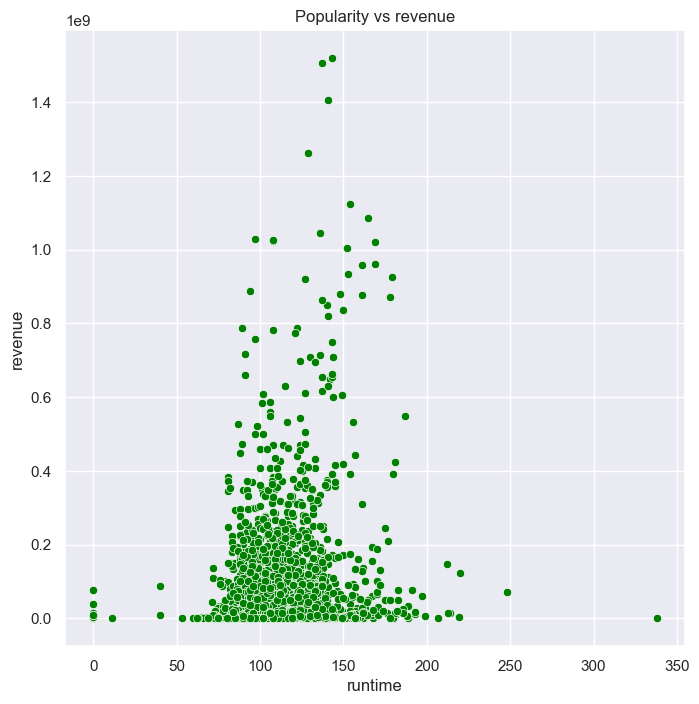

In [179]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_data,x='runtime',y='revenue',color='green')
plt.title('Popularity vs revenue')
plt.show()

#### Dummy testing

In [180]:
dummy_data = {'movie':['a','b','c','d','e','f','g','h','i','j','k','l'],
              'release_date':['2/20/75','12/20/38','5/23/10','11/2/74','7/25/95','2/20/95','2/20/25','12/11/07','1/22/08',None,'6/21/17','10/10/21']}
df = pd.DataFrame(dummy_data)
df

,movie,release_date
0,a,2/20/75
1,b,12/20/38
2,c,5/23/10
3,d,11/2/74
4,e,7/25/95
5,f,2/20/95
6,g,2/20/25
7,h,12/11/07
8,i,1/22/08
9,j,None


In [181]:
df[['m','d','y']] = df['release_date'].str.split('/',expand=True).replace(np.nan,-1).astype(int)
df

,movie,release_date,m,d,y
0,a,2/20/75,2,20,75
1,b,12/20/38,12,20,38
2,c,5/23/10,5,23,10
3,d,11/2/74,11,2,74
4,e,7/25/95,7,25,95
5,f,2/20/95,2,20,95
6,g,2/20/25,2,20,25
7,h,12/11/07,12,11,7
8,i,1/22/08,1,22,8
9,j,None,-1,-1,-1


In [182]:
df.loc[(df['y']>19)&(df['y']<100)]


,movie,release_date,m,d,y
0,a,2/20/75,2,20,75
1,b,12/20/38,12,20,38
3,d,11/2/74,11,2,74
4,e,7/25/95,7,25,95
5,f,2/20/95,2,20,95
6,g,2/20/25,2,20,25
11,l,10/10/21,10,10,21


In [183]:
df.loc[(df['y']<=19)&(df['y']<=100),'y'] += 2000
df.loc[(df['y']>19)&(df['y']<100),'y'] += 1900

df

,movie,release_date,m,d,y
0,a,2/20/75,2,20,1975
1,b,12/20/38,12,20,1938
2,c,5/23/10,5,23,2010
3,d,11/2/74,11,2,1974
4,e,7/25/95,7,25,1995
5,f,2/20/95,2,20,1995
6,g,2/20/25,2,20,1925
7,h,12/11/07,12,11,2007
8,i,1/22/08,1,22,2008
9,j,None,-1,-1,1999


In [184]:
df['release_date'] = pd.to_datetime(df['release_date'],format='%m/%d/%y')
df

,movie,release_date,m,d,y
0,a,1975-02-20,2,20,1975
1,b,2038-12-20,12,20,1938
2,c,2010-05-23,5,23,2010
3,d,1974-11-02,11,2,1974
4,e,1995-07-25,7,25,1995
5,f,1995-02-20,2,20,1995
6,g,2025-02-20,2,20,1925
7,h,2007-12-11,12,11,2007
8,i,2008-01-22,1,22,2008
9,j,NaT,-1,-1,1999


In [185]:
pd.to_datetime('12/20/38', format='%m/%d/%y') 

Timestamp('2038-12-20 00:00:00')

#### Continue...

In [186]:
# Decomposition of Date -> Date related features.
train_data[['month','day','year']] = train_data['release_date'].str.split('/',expand=True).replace(np.nan,-1).astype(int)
train_data[['release_date','month','day','year']].sample(10)

,release_date,month,day,year
2596,11/12/82,11,12,82
875,5/2/97,5,2,97
2949,9/24/99,9,24,99
1761,4/1/15,4,1,15
1818,5/15/02,5,15,2
1830,7/30/99,7,30,99
1684,2/27/14,2,27,14
831,11/19/08,11,19,8
2620,12/19/97,12,19,97
475,8/3/12,8,3,12


In [187]:
train_data.loc[(train_data['year']<=19)&(train_data['year']<100),'year'] += 2000
train_data.loc[(train_data['year']>19)&(train_data['year']<100),'year'] += 1900
train_data[['release_date','month','day','year']].sample(10)

,release_date,month,day,year
846,12/22/16,12,22,2016
2547,12/14/07,12,14,2007
1415,10/6/11,10,6,2011
2844,2/20/04,2,20,2004
1786,4/16/99,4,16,1999
1591,8/9/90,8,9,1990
2972,7/27/06,7,27,2006
444,10/19/16,10,19,2016
2727,9/2/11,9,2,2011
767,8/17/07,8,17,2007


In [188]:
# coverted the release_date columns into datetime 
train_data['release_date'] = pd.to_datetime(train_data['release_date'],format='%m/%d/%y')
train_data['release_date']

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [189]:
train_data['month_name'] = train_data['release_date'].dt.month_name()
train_data['day_name'] = train_data['release_date'].dt.day_name()

train_data['quarter'] = train_data['release_date'].dt.quarter
train_data['day_of_week'] = train_data['release_date'].dt.dayofweek # Monday=0, Sunday=6

train_data[['release_date','year','month','month_name','day','day_name','quarter','day_of_week']].sample(5)

,release_date,year,month,month_name,day,day_name,quarter,day_of_week
2986,2004-09-03,2004,9,September,3,Friday,3,4
693,2014-10-09,2014,10,October,9,Thursday,4,3
2968,2005-10-22,2005,10,October,22,Saturday,4,5
2147,2068-06-12,1968,6,June,12,Tuesday,2,1
2187,1999-05-15,1999,5,May,15,Saturday,2,5


In [190]:
train_data['year'].describe()

count    3000.000000
mean     1999.713000
std        15.423313
min      1921.000000
25%      1993.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: year, dtype: float64

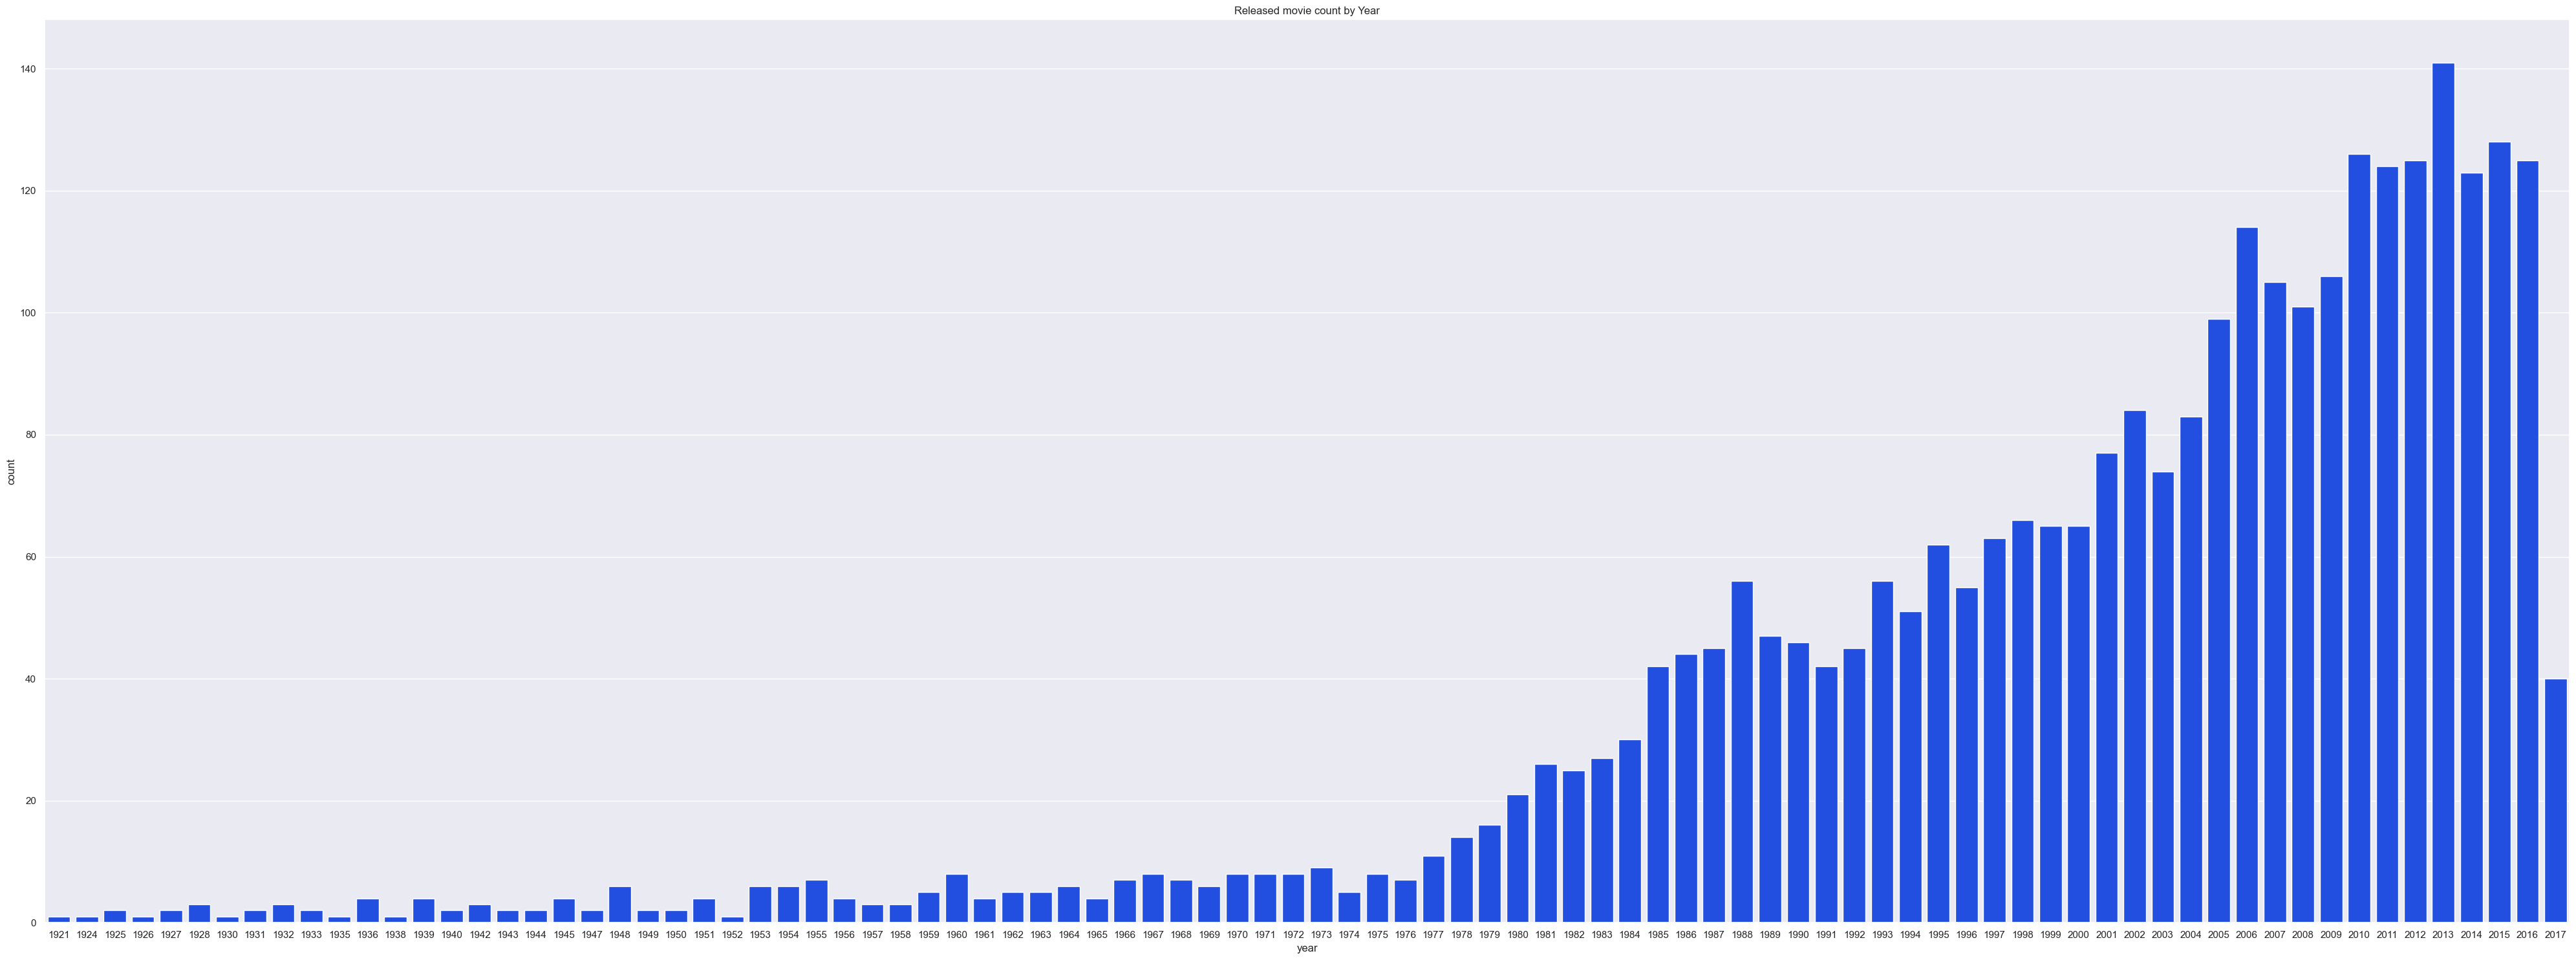

In [191]:
plt.figure(figsize=(40,15))
sns.countplot(data=train_data,x='year')
plt.title('Released movie count by Year')
plt.tight_layout()

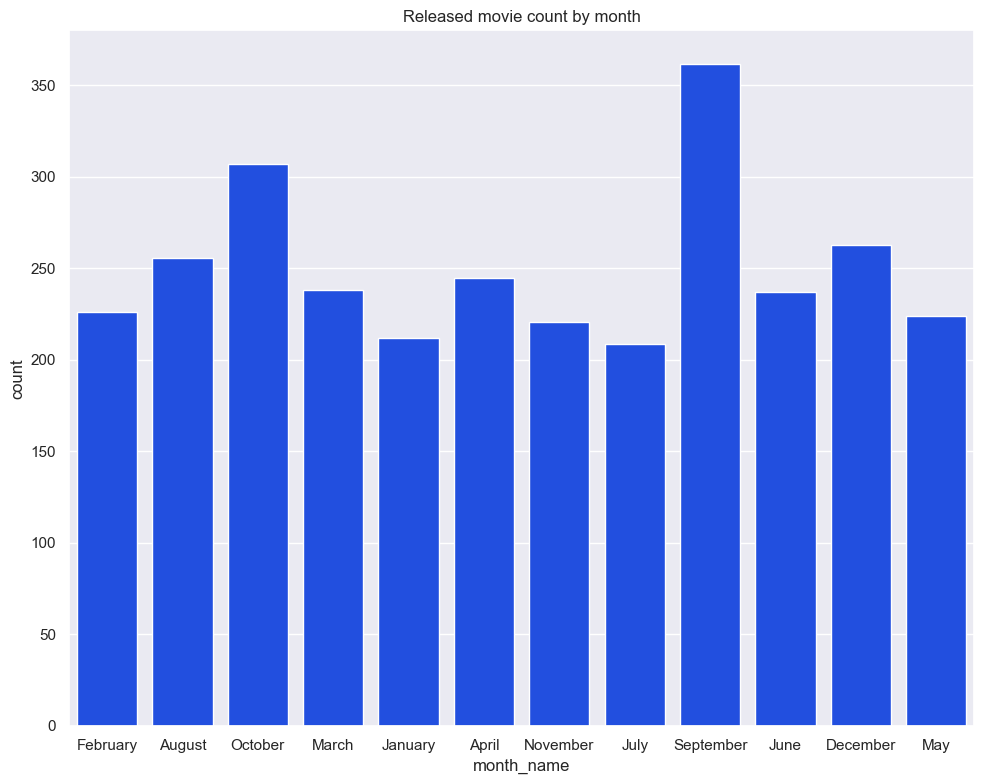

In [192]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_data,x='month_name')
plt.title('Released movie count by month')
plt.tight_layout()

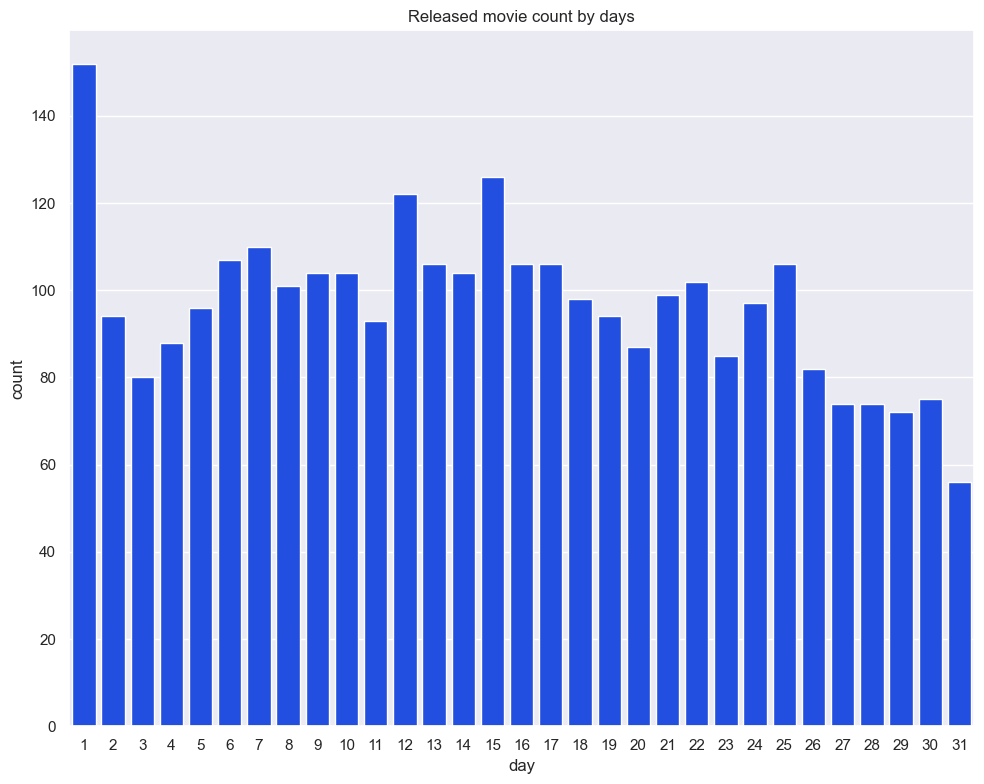

In [193]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_data,x='day')
plt.title('Released movie count by days')
plt.tight_layout()

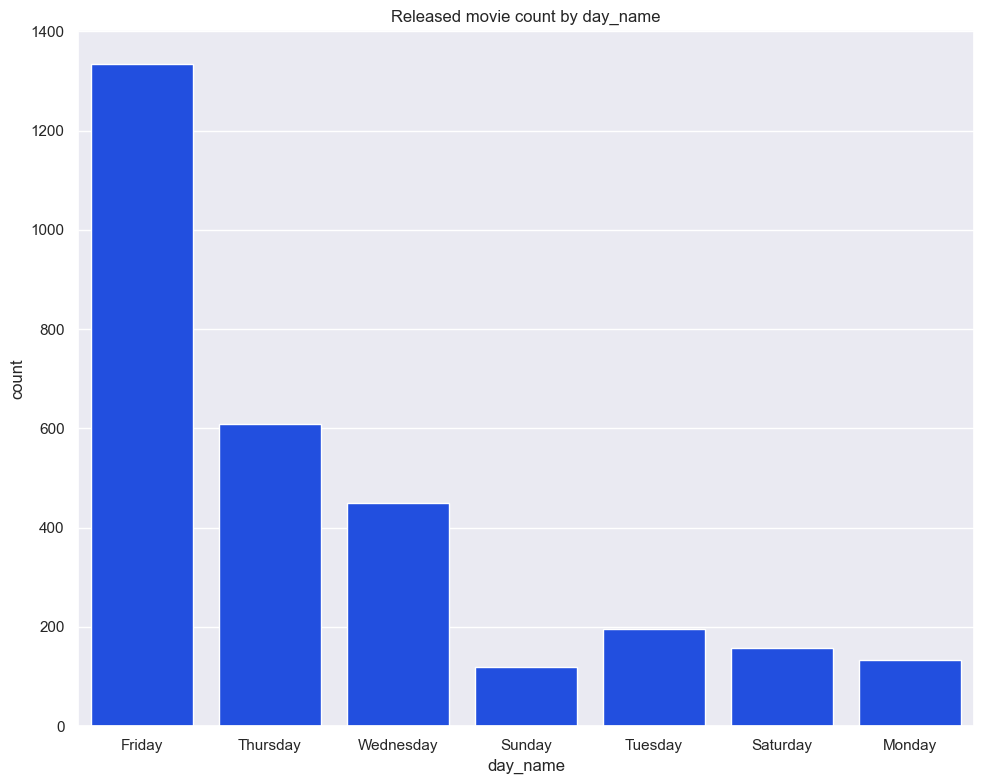

In [194]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_data,x='day_name')
plt.title('Released movie count by day_name')
plt.tight_layout()

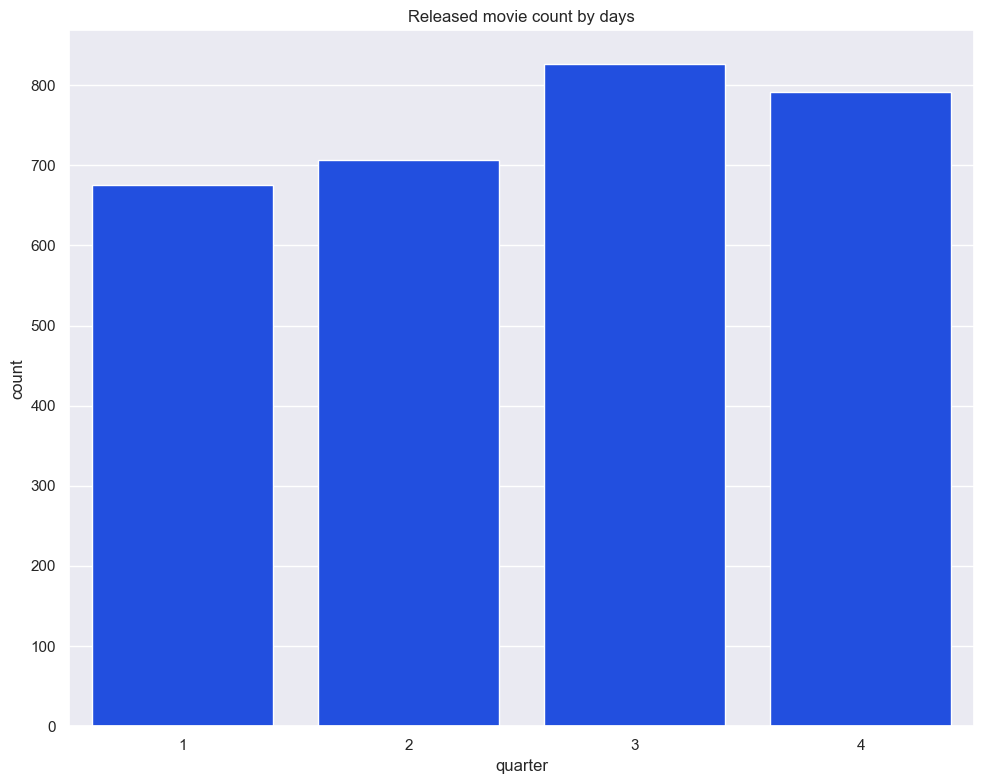

In [195]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_data,x='quarter')
plt.title('Released movie count by days')
plt.tight_layout()

In [196]:

train_data['log_budget'] = np.log(train_data['budget']+1)

<Axes: xlabel='log_budget', ylabel='Count'>

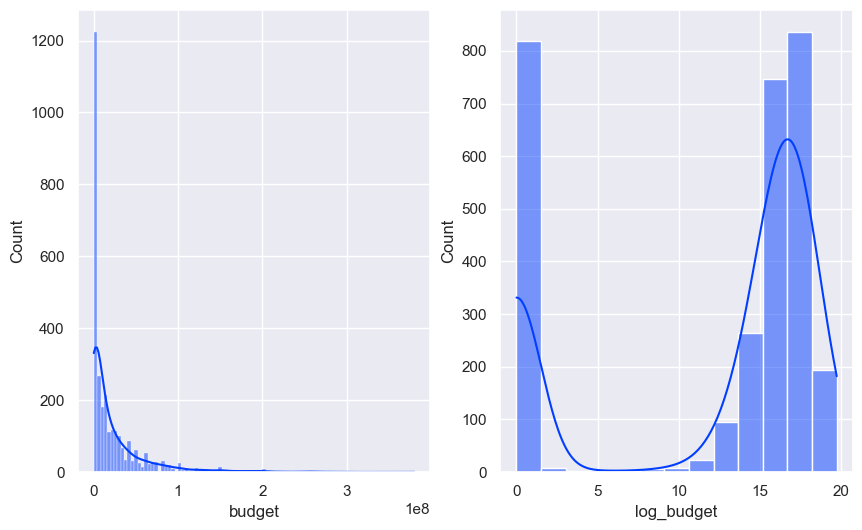

In [197]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
sns.histplot(train_data['budget'],ax=ax1,kde=True)
sns.histplot(train_data['log_budget'], ax=ax2, kde=True)

**inflation_budget**
- we know the budget increases yearly to some extent due to inflation.
- `InflationBudget(current) = Budget(1+1.8/100 * (Maxyear - year(current_year)))`

<Axes: xlabel='inflation_budget', ylabel='Count'>

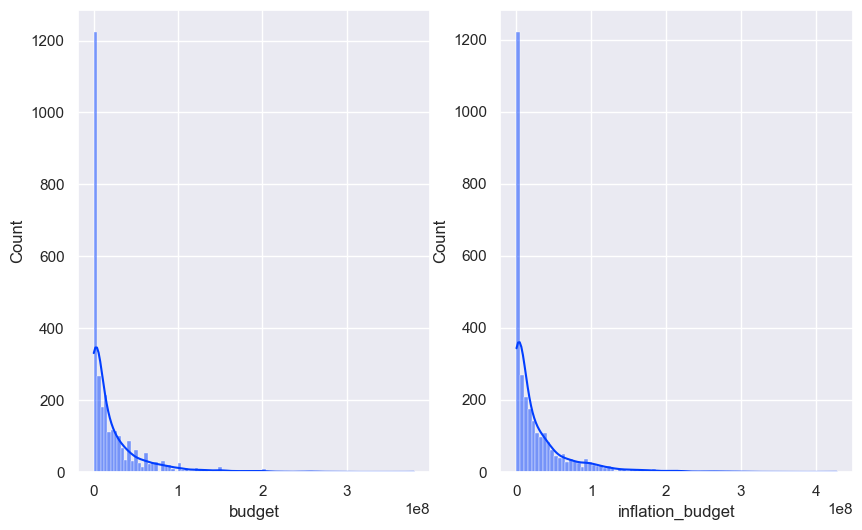

In [198]:
train_data['inflation_budget'] = train_data['budget'] * (1 + (1.8 /100) * (2018-train_data['year']))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
sns.histplot(train_data['budget'],ax=ax1,kde=True)
sns.histplot(train_data['inflation_budget'], ax=ax2, kde=True)

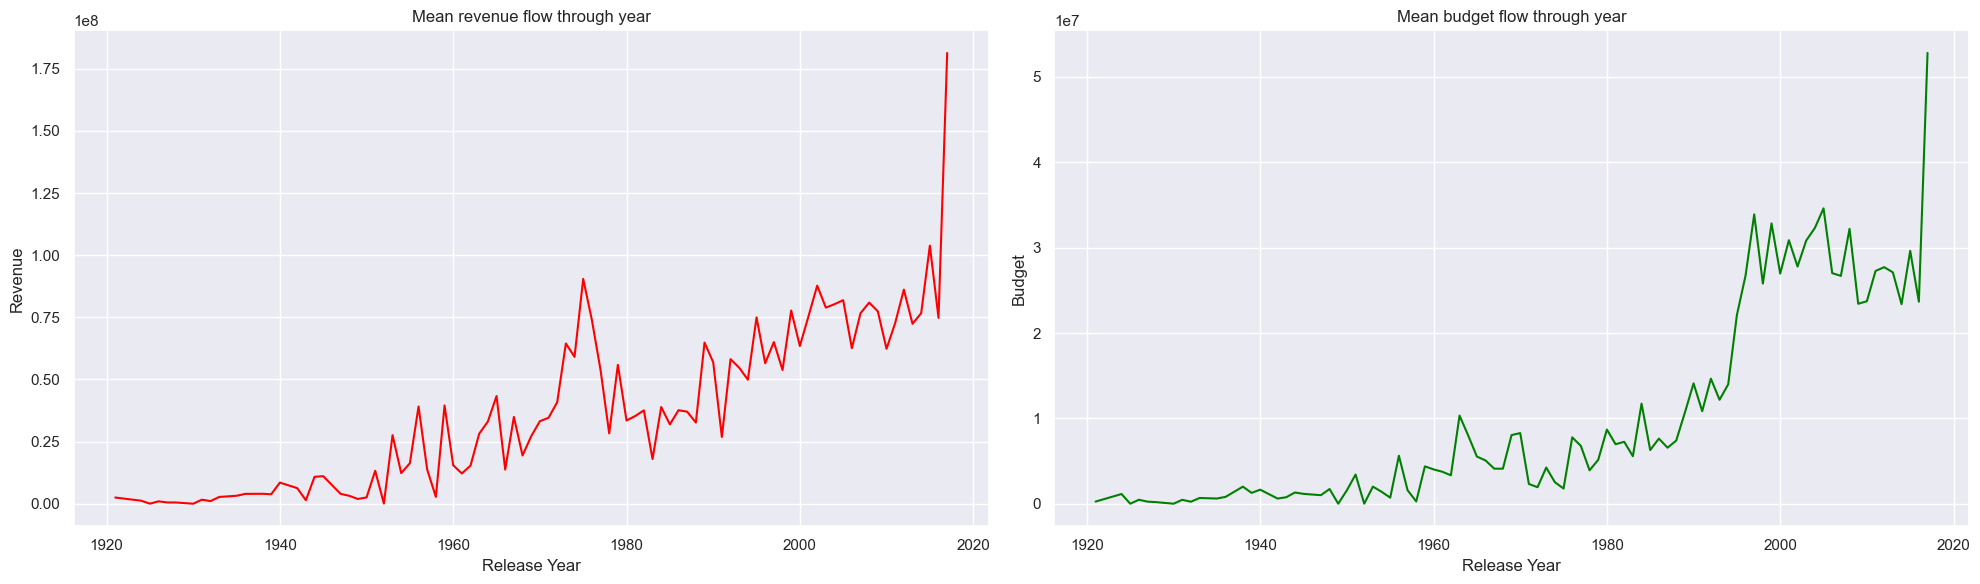

In [199]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,6))

ax0.plot(train_data.groupby("year")['revenue'].agg('mean'),color='red')
ax0.set_title("Mean revenue flow through year")
ax0.set_xlabel('Release Year')
ax0.set_ylabel('Revenue')

ax1.plot(train_data.groupby("year")['budget'].agg('mean'),color='green')
ax1.set_title("Mean budget flow through year")
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Budget')

plt.tight_layout()
plt.show()

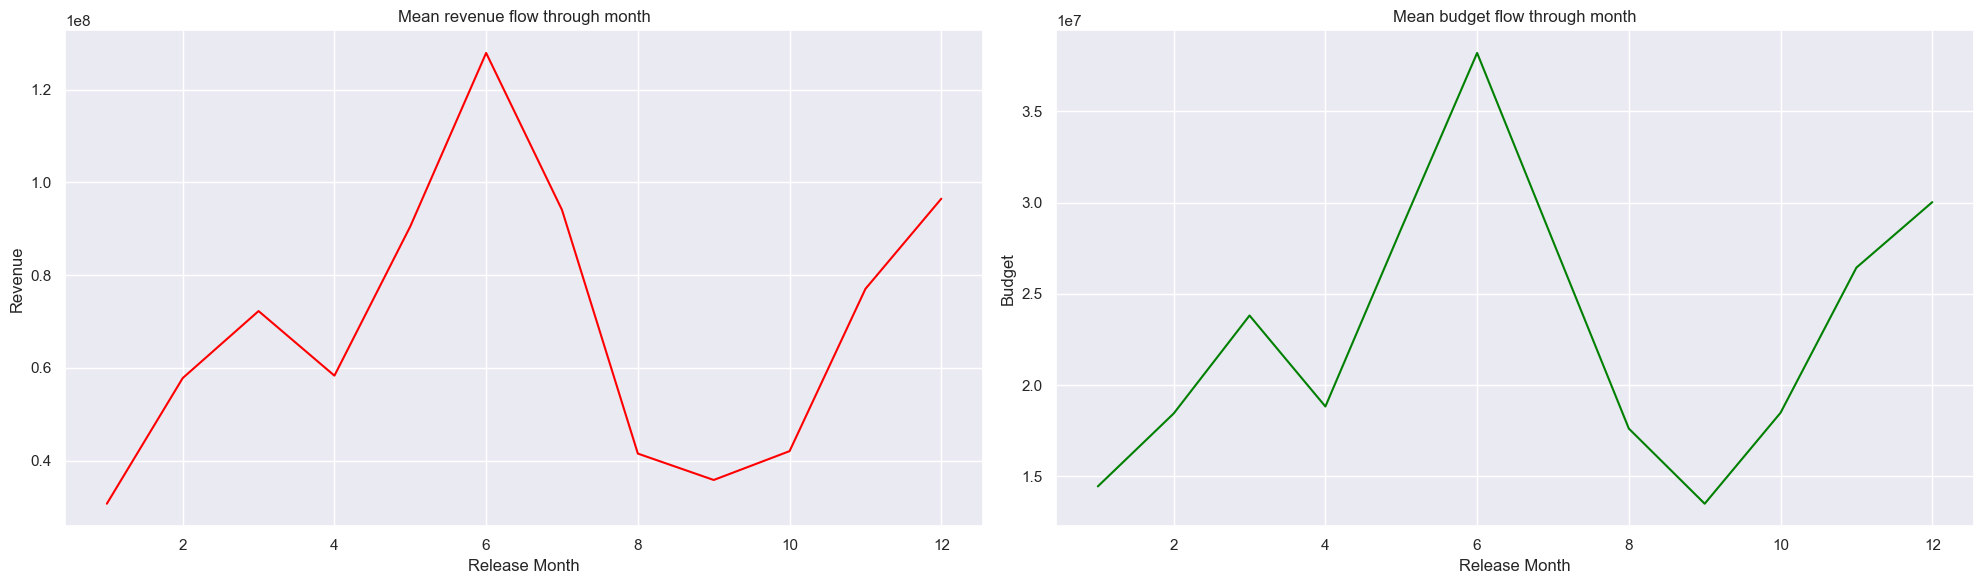

In [200]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,6))

ax0.plot(train_data.groupby("month")['revenue'].agg('mean'),color='red')
ax0.set_title("Mean revenue flow through month")
ax0.set_xlabel('Release Month')
ax0.set_ylabel('Revenue')

ax1.plot(train_data.groupby("month")['budget'].agg('mean'),color='green')
ax1.set_title("Mean budget flow through month")
ax1.set_xlabel('Release Month')
ax1.set_ylabel('Budget')

plt.tight_layout()
plt.show()

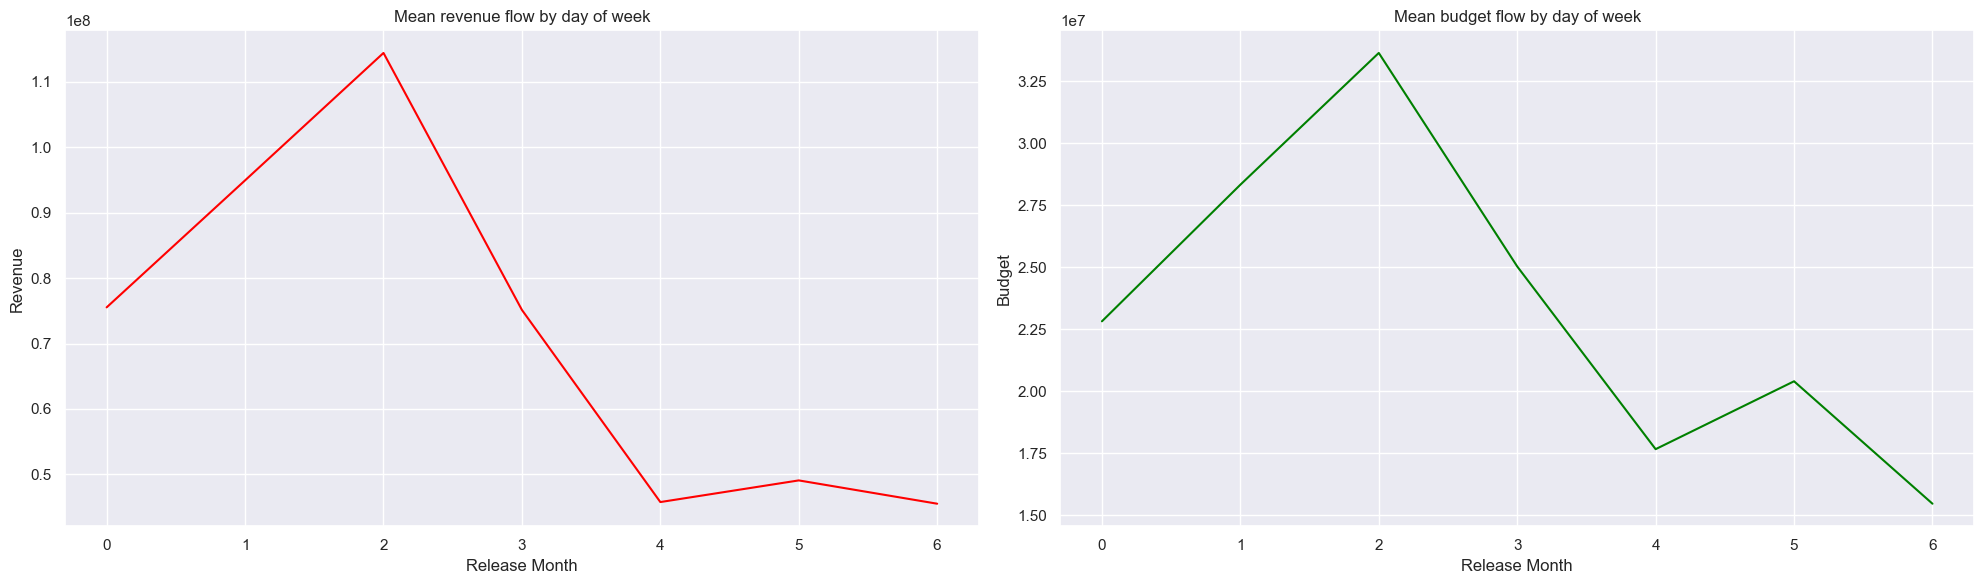

In [201]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,6))

ax0.plot(train_data.groupby("day_of_week")['revenue'].agg('mean'),color='red')
ax0.set_title("Mean revenue flow by day of week")
ax0.set_xlabel('Release Month')
ax0.set_ylabel('Revenue')

ax1.plot(train_data.groupby("day_of_week")['budget'].agg('mean'),color='green')
ax1.set_title("Mean budget flow by day of week")
ax1.set_xlabel('Release Month')
ax1.set_ylabel('Budget')

plt.tight_layout()
plt.show()

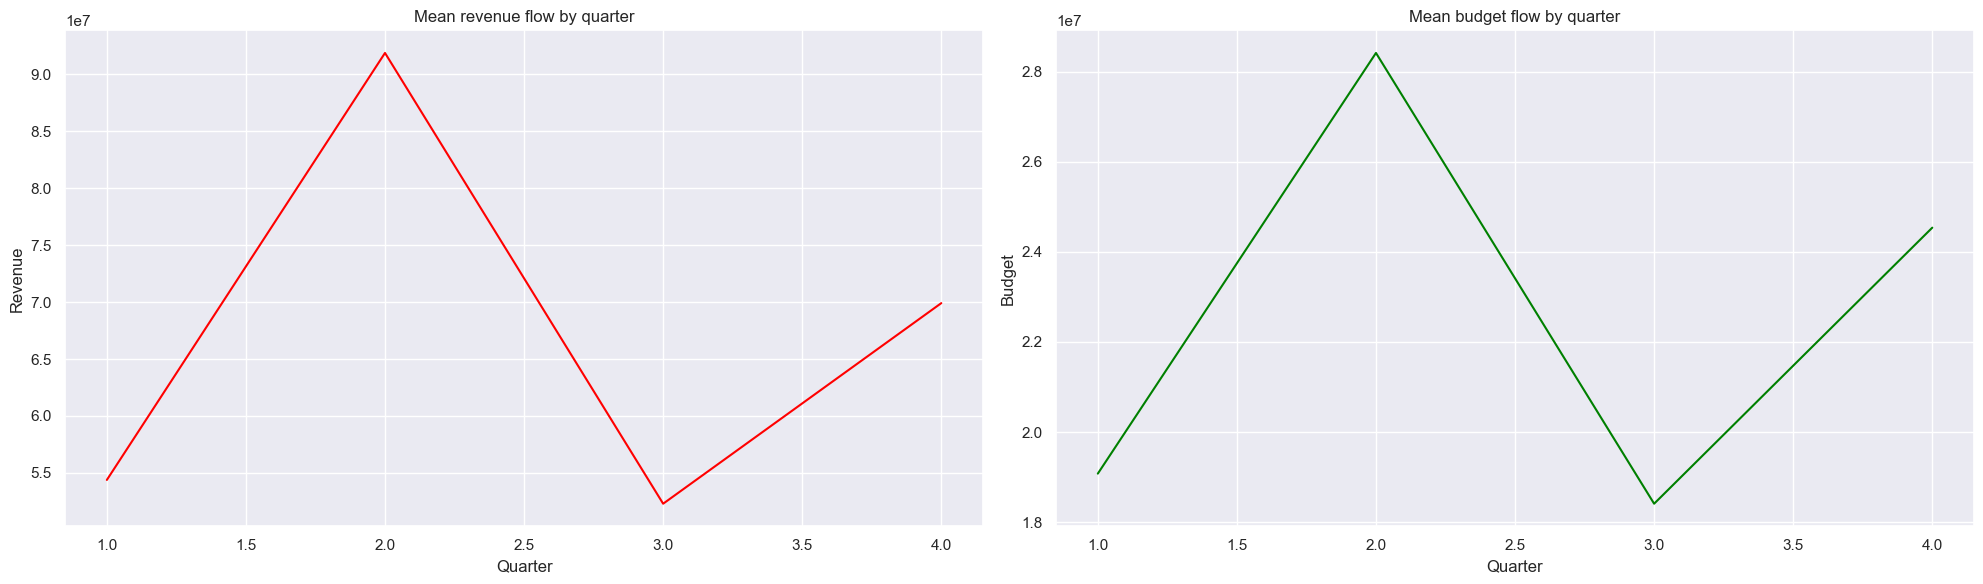

In [202]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,6))

ax0.plot(train_data.groupby("quarter")['revenue'].agg('mean'),color='red')
ax0.set_title("Mean revenue flow by quarter")
ax0.set_xlabel('Quarter')
ax0.set_ylabel('Revenue')

ax1.plot(train_data.groupby("quarter")['budget'].agg('mean'),color='green')
ax1.set_title("Mean budget flow by quarter")
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Budget')

plt.tight_layout()
plt.show()

In [203]:
train_data['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

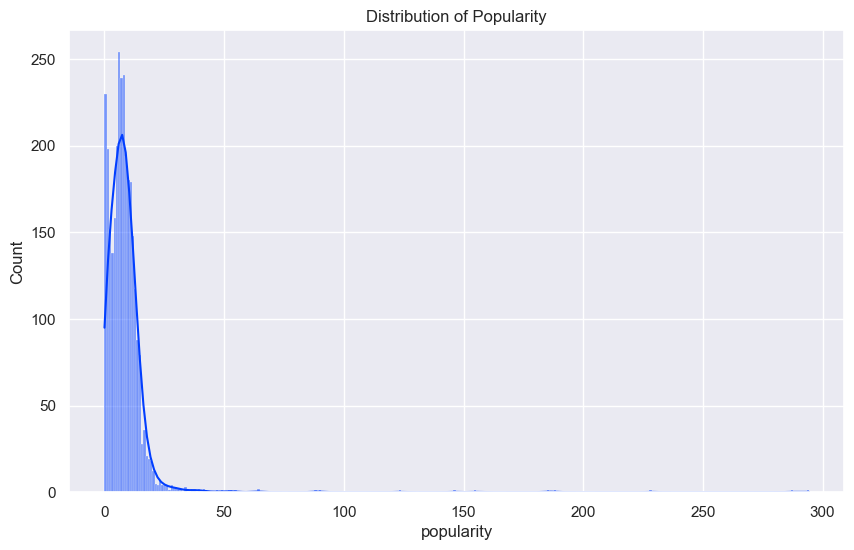

In [204]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data,x='popularity',kde=True)
plt.title('Distribution of Popularity')
plt.show()

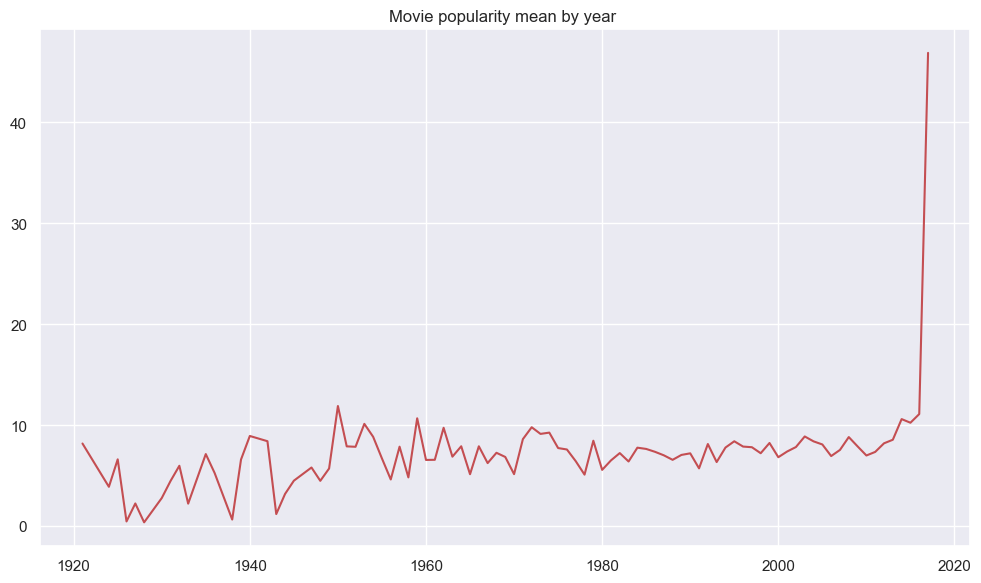

In [205]:
plt.figure(figsize=(10,6))
plt.plot(train_data.groupby('year')['popularity'].agg('mean'),color='r')
plt.title("Movie popularity mean by year ")
plt.tight_layout()
plt.show()

In [206]:
# runtime is measured in minutes
train_data['runtime'].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Distribution of Runtime')

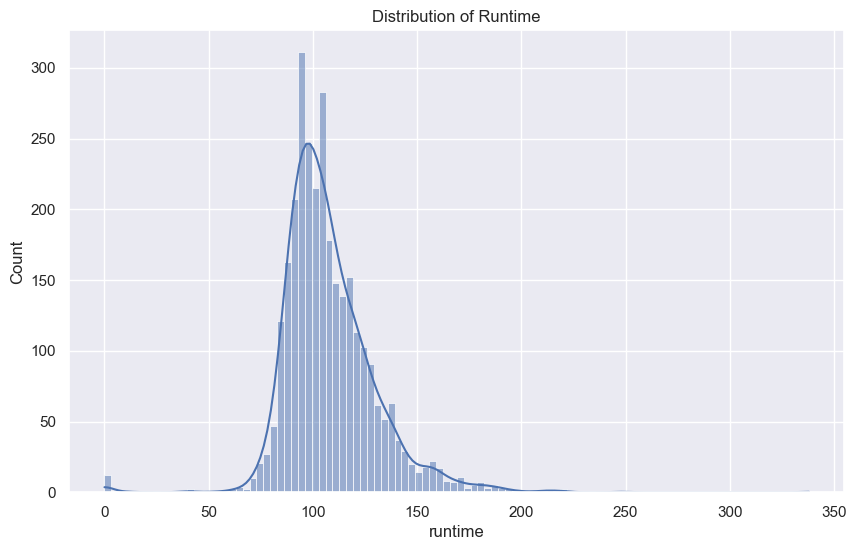

In [207]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data,x='runtime',color='b',kde=True)
plt.title('Distribution of Runtime')

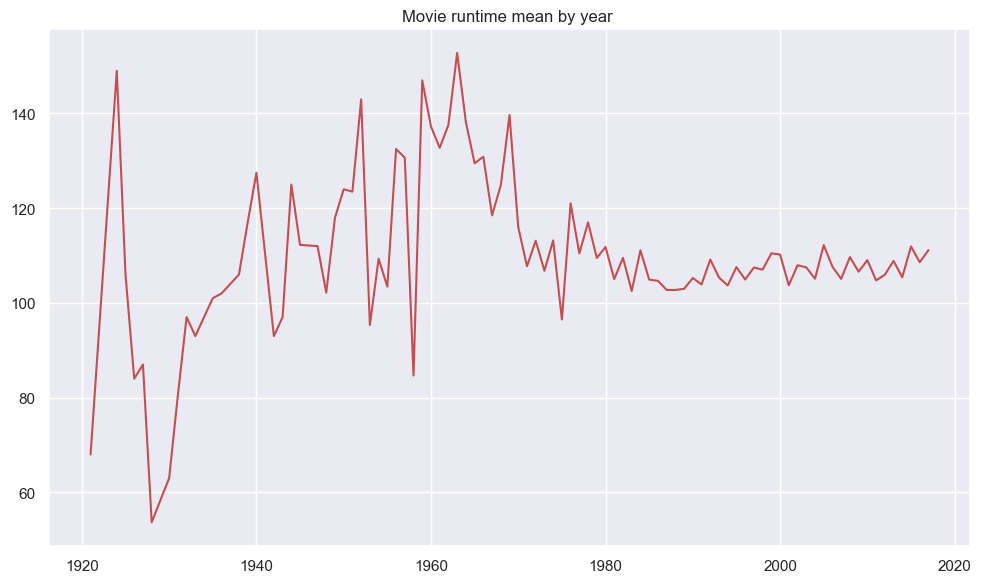

In [208]:
plt.figure(figsize=(10,6))
plt.plot(train_data.groupby('year')['runtime'].agg('mean'),color='r')
plt.title("Movie runtime mean by year ")
plt.tight_layout()
plt.show()

In [209]:
import ast
string = "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"
print(string,type(string))
data = ast.literal_eval(string)
print(type(data[0]))

[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}] <class 'str'>
<class 'dict'>


In [210]:
import ast
# Let's take the genre list from the dictionary
# Function to extract genre names safely
def extract_genre_list(genre_str):
    if pd.isna(genre_str):
        return []
    try:
        genre_data = ast.literal_eval(genre_str) # evaluate and convert python literals(list, dict) to its corresponding datatype.
        return [genre['name'] for genre in genre_data]
    except (ValueError, SyntaxError, TypeError):
        return []

train_data['genres_list'] = train_data['genres'].apply(extract_genre_list)
train_data[['genres','genres_list']]

,genres,genres_list
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]"
2,"[{'id': 18, 'name': 'Drama'}]",[Drama]
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]"
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]"
...,...,...
2995,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"
2996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...","[Drama, Music]"
2997,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","[Crime, Action, Mystery, Thriller]"
2998,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"


In [211]:
from collections import Counter
all_genres = [genre for genres in train_data['genres_list'] for genre in genres]
genre_counts = dict(Counter(all_genres))
for _, i in genre_counts.items():
    print(f"{_} : {i}")

Comedy : 1028
Drama : 1531
Family : 260
Romance : 571
Thriller : 789
Action : 741
Animation : 141
Adventure : 439
Horror : 301
Documentary : 87
Music : 100
Crime : 469
Science Fiction : 290
Mystery : 225
Foreign : 31
Fantasy : 232
War : 100
Western : 43
History : 132
TV Movie : 1


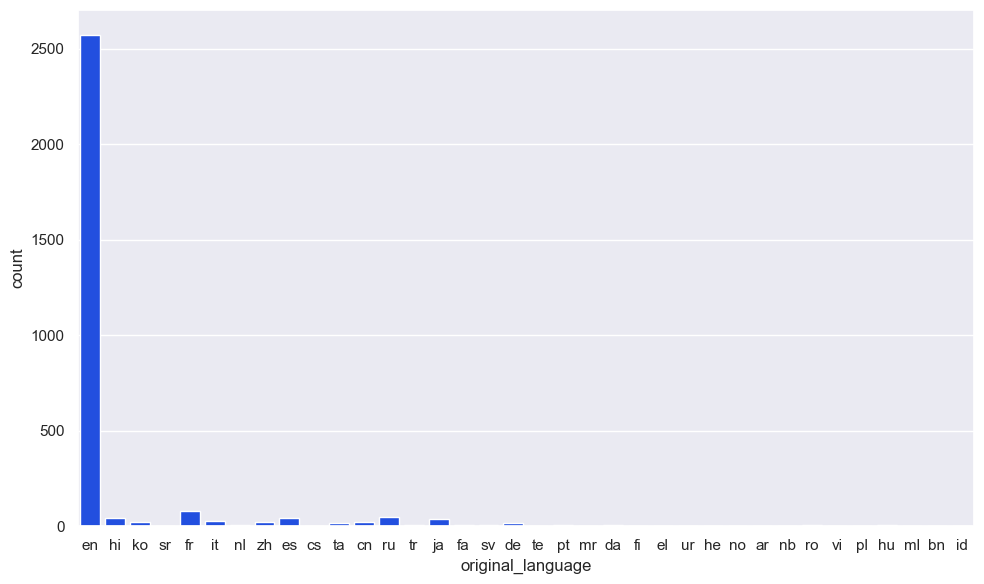

In [212]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data,x='original_language')
plt.tight_layout()
plt.show()

In [213]:
# Feature Engineering
train_data['budget_runtime_ratio'] = train_data['budget'] / train_data['runtime']
train_data['budget_popularity_ratio'] = train_data['budget'] / train_data['popularity']
train_data['budget_year_ratio'] = train_data['budget'] / train_data['year']
train_data['releaseyear_popularity_ratio'] = train_data['year'] / train_data['popularity']

In [214]:
# has homepage
train_data['has_homepage'] = 1
train_data.loc[pd.isnull(train_data['homepage']),"has_homepage"] = 0

# was in english
train_data['is_english'] = np.where(train_data['original_language']=='en',1,0)

# has homepage
train_data['has_homepage'] = 1
train_data.loc[pd.isnull(train_data['homepage']),"has_homepage"] = 0

In [215]:
# is tagline
train_data['is_tagline'] = 1
train_data.loc[pd.isnull(train_data['tagline']),"has_homepage"] = 0

In [216]:
# cast number
train_data['cast'] = train_data['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
train_data['cast_count'] = train_data['cast'].apply(lambda x : len(x) if isinstance(x, list) else 0)
train_data['crew'] = train_data['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
train_data['crew_count'] = train_data['crew'].apply(lambda x : len(x) if isinstance(x, list) else 0)

In [217]:
train_data['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [218]:
# removing this four rumored movies
train_data = train_data[train_data['status']!='Rumored']

In [219]:
train_data[['cast_count','crew_count']].describe()

,cast_count,crew_count
count,2996.000000,2996.000000
mean,20.624833,24.388852
std,16.629663,28.077177
min,0.000000,0.000000
25%,11.000000,8.000000
50%,16.000000,14.000000
75%,24.000000,28.250000
max,156.000000,194.000000


In [220]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2996 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            2996 non-null   int64         
 1   belongs_to_collection         603 non-null    object        
 2   budget                        2996 non-null   int64         
 3   genres                        2989 non-null   object        
 4   homepage                      946 non-null    object        
 5   imdb_id                       2996 non-null   object        
 6   original_language             2996 non-null   object        
 7   original_title                2996 non-null   object        
 8   overview                      2988 non-null   object        
 9   popularity                    2996 non-null   float64       
 10  poster_path                   2995 non-null   object        
 11  production_companies          2843 

In [221]:
final_df = train_data[['budget_runtime_ratio',
                       'budget_popularity_ratio',
                       'budget_year_ratio',
                       'releaseyear_popularity_ratio',
                       'has_homepage',
                       'is_english',
                       'is_tagline',
                       'cast_count',
                       'crew_count',
                       'year','month','day','quarter',
                       'popularity',
                       'runtime',
                       'inflation_budget','log_budget',
                       'revenue']]
final_df.head()

,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,releaseyear_popularity_ratio,has_homepage,is_english,is_tagline,cast_count,crew_count,year,month,day,quarter,popularity,runtime,inflation_budget,log_budget,revenue
0,150537.634409,2.129150e+06,6947.890819,306.445562,0,1,1,24,72,2015,2,20,1,6.575393,93.0,14756000.0,16.454568,12314651
1,353982.300885,4.849134e+06,19960.079840,242.941630,0,1,1,20,9,2004,8,6,3,8.248895,113.0,50080000.0,17.504390,95149435
2,31428.571429,5.132194e+04,1638.530288,31.321933,1,1,1,51,64,2014,10,10,4,64.299990,105.0,3537600.0,15.009433,13092000
3,9836.065574,3.779604e+05,596.421471,633.713561,0,0,1,7,3,2012,3,9,1,3.174936,122.0,1329600.0,13.997833,16000000
4,0.000000,0.000000e+00,0.000000,1749.893299,0,0,1,4,2,2009,2,5,1,1.148070,118.0,0.0,0.000000,3923970


In [222]:
final_df.isnull().sum()

budget_runtime_ratio            8
budget_popularity_ratio         0
budget_year_ratio               0
releaseyear_popularity_ratio    0
has_homepage                    0
is_english                      0
is_tagline                      0
cast_count                      0
crew_count                      0
year                            0
month                           0
day                             0
quarter                         0
popularity                      0
runtime                         2
inflation_budget                0
log_budget                      0
revenue                         0
dtype: int64

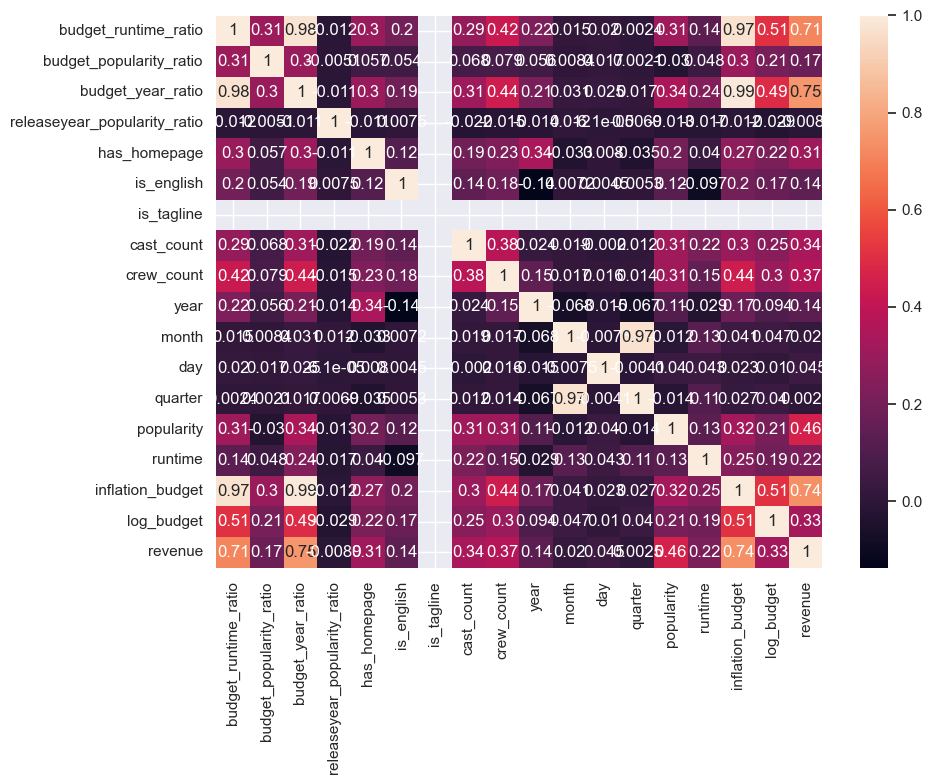

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True)
plt.tight_layout()
plt.show()

In [224]:
# impute the null value with zero.
final_df.fillna(0.0,inplace=True)

In [226]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2996 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   budget_runtime_ratio          2996 non-null   float64
 1   budget_popularity_ratio       2996 non-null   float64
 2   budget_year_ratio             2996 non-null   float64
 3   releaseyear_popularity_ratio  2996 non-null   float64
 4   has_homepage                  2996 non-null   int64  
 5   is_english                    2996 non-null   int32  
 6   is_tagline                    2996 non-null   int64  
 7   cast_count                    2996 non-null   int64  
 8   crew_count                    2996 non-null   int64  
 9   year                          2996 non-null   int32  
 10  month                         2996 non-null   int32  
 11  day                           2996 non-null   int32  
 12  quarter                       2996 non-null   int32  
 13  populari